# **پیش گزارش**

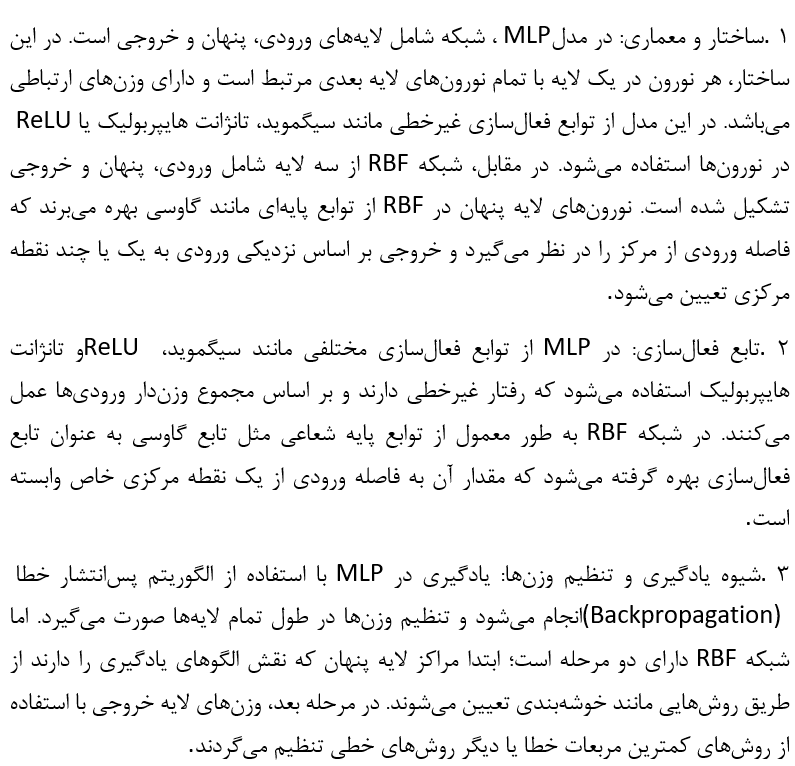

# **آزمایش**

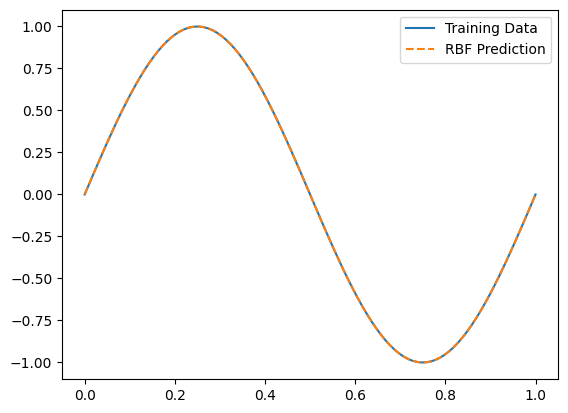

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8138
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7095 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6855 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5635 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4632 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3946 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3554 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2389 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1828  
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0931 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0519  
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9841 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9226 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9340 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8384 
Epoch 16/100
4/4 ━━━━━━━━━━━━━

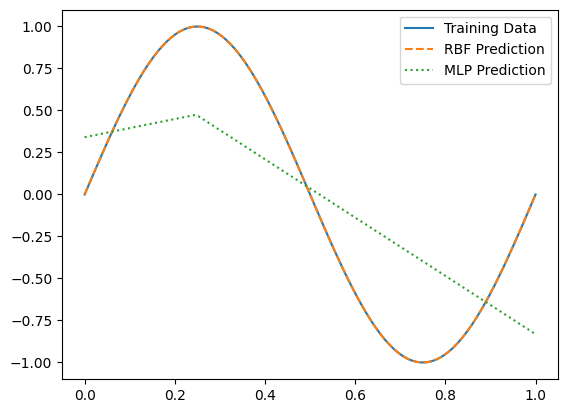

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

class SimpleRBFnn:
    def __init__(self, input_size, neuron_num, output_size):
        self.N = input_size
        self.M = neuron_num
        self.L = output_size
        self.mu = np.zeros((neuron_num, input_size))
        self.sigma = np.ones(neuron_num)
        self.W = np.random.randn(neuron_num, output_size)
        self.bias = np.zeros(output_size)

    def center_init(self, x):
        kmeans = KMeans(n_clusters=self.M, random_state=0).fit(x)
        self.mu = kmeans.cluster_centers_

    def rbf_function(self, x, center, sigma):
        return np.exp(-np.linalg.norm(x - center)**2 / (2 * sigma**2))

    def forward(self, x):
        phi = np.zeros((x.shape[0], self.M))
        for i in range(self.M):
            phi[:, i] = np.apply_along_axis(self.rbf_function, 1, x, self.mu[i], self.sigma[i])
        return phi @ self.W + self.bias

    def train(self, x, y, learning_rate=0.01, epochs=100):
        self.center_init(x)

        for epoch in range(epochs):
            phi = np.zeros((x.shape[0], self.M))
            for i in range(self.M):
                phi[:, i] = np.apply_along_axis(self.rbf_function, 1, x, self.mu[i], self.sigma[i])

            self.W = np.linalg.pinv(phi) @ y

    def predict(self, x):
        return self.forward(x)

X_train = np.linspace(0, 1, 100).reshape(-1, 1)
y_train = np.sin(2 * np.pi * X_train)

# Initialize the RBF network
rbf_nn = SimpleRBFnn(input_size=1, neuron_num=10, output_size=1)

rbf_nn.train(X_train, y_train, learning_rate=0.01, epochs=100)

X_test = np.linspace(0, 1, 100).reshape(-1, 1)
y_pred = rbf_nn.predict(X_test)

plt.plot(X_train, y_train, label='Training Data')
plt.plot(X_test, y_pred, label='RBF Prediction', linestyle='--')
plt.legend()
plt.show()
# با استفاده از تنسرفلو
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=100, verbose=1)

y_mlp_pred = model.predict(X_test)

plt.plot(X_train, y_train, label='Training Data')
plt.plot(X_test, y_pred, label='RBF Prediction', linestyle='--')
plt.plot(X_test, y_mlp_pred, label='MLP Prediction', linestyle=':')
plt.legend()
plt.show()


# **تمرین**

In [6]:
#گفتین نیازی نیستتت